In [179]:
import pandas as pd 
import numpy as np 

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import matplotlib.patheffects as path_effects
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from PIL import Image
import requests
from io import BytesIO

In [180]:
data = pd.read_csv("standard-stats-player-championsleague.csv",sep=';',encoding='latin-1')
datast = data.copy()

In [181]:
datast.head()

,PlayerN,Player,NationN,Nation,Pos,SquadN,Squad,AgeN,Age,MP,...,GpAmPKPer90,xG,npxG,xA,npxGxA,xGPer90,xAPer90,xGxAPer90,npxGPer90,npxGxAPer90
0,Brenden Aaronson\5bc43860,Brenden Aaronson,us USA,USA,MF,at RB Salzburg,RB Salzburg,21-174,21,8,...,0.25,0.6,0.6,1.0,1.6,0.08,0.13,0.20,0.08,0.20
1,Malik Abubakari\47aaf574,Malik Abubakari,gh GHA,GHA,FW,se Malmö,Malmö,21-339,21,4,...,0.00,0.1,0.1,0.0,0.1,0.07,0.02,0.10,0.07,0.10
2,Marcos Acuña\81442ecb,Marcos Acuña,ar ARG,ARG,DF,es Sevilla,Sevilla,30-168,30,5,...,0.00,0.0,0.0,0.6,0.6,0.00,0.14,0.14,0.00,0.14
3,Tyler Adams\2b09d998,Tyler Adams,us USA,USA,MF,de RB Leipzig,RB Leipzig,23-059,23,5,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
4,Chikwubuike Adamu\82e12fe7,Chikwubuike Adamu,at AUT,AUT,FW,at RB Salzburg,RB Salzburg,20-312,20,8,...,0.38,0.6,0.6,0.2,0.8,0.24,0.08,0.32,0.24,0.32


In [182]:
datast.corr()

,Age,MP,Starts,Min,90s,Gls,Ast,GmPK,PK,PKatt,...,GpAmPKPer90,xG,npxG,xA,npxGxA,xGPer90,xAPer90,xGxAPer90,npxGPer90,npxGxAPer90
Age,1.000000,0.207131,0.231420,0.234851,0.235389,0.081368,0.042760,0.066663,0.100431,0.083514,...,-0.011358,0.079571,0.067029,0.084153,0.082811,-0.037094,-0.016018,-0.038899,-0.050669,-0.050513
MP,0.207131,1.000000,0.835411,0.879102,0.879099,0.348025,0.355843,0.345162,0.177989,0.184303,...,0.089252,0.404361,0.415287,0.456678,0.490902,0.013769,0.058628,0.037523,-0.007763,0.019825
Starts,0.231420,0.835411,1.000000,0.980910,0.980858,0.309923,0.335185,0.301848,0.181657,0.189276,...,0.022190,0.362999,0.364919,0.426169,0.441983,-0.039665,-0.006348,-0.036593,-0.061928,-0.055697
Min,0.234851,0.879102,0.980910,1.000000,0.999945,0.317567,0.339538,0.311545,0.176700,0.182395,...,0.025986,0.365932,0.370794,0.425505,0.445871,-0.044652,-0.009272,-0.042106,-0.065294,-0.059879
90s,0.235389,0.879099,0.980858,0.999945,1.000000,0.317887,0.340265,0.311877,0.176801,0.182572,...,0.026716,0.366441,0.371342,0.425939,0.446458,-0.044514,-0.008771,-0.041763,-0.065144,-0.059520
Gls,0.081368,0.348025,0.309923,0.317567,0.317887,1.000000,0.317918,0.980251,0.559710,0.579548,...,0.441955,0.897666,0.867422,0.456582,0.800585,0.378789,0.163193,0.395599,0.318237,0.345480
Ast,0.042760,0.355843,0.335185,0.339538,0.340265,0.317918,1.000000,0.319268,0.145976,0.167995,...,0.416541,0.362530,0.371694,0.709349,0.573951,0.107627,0.357905,0.251304,0.086621,0.237919
GmPK,0.066663,0.345162,0.301848,0.311545,0.311877,0.980251,0.319268,1.000000,0.384778,0.417695,...,0.461684,0.856686,0.871051,0.451618,0.801030,0.363313,0.160231,0.381041,0.328674,0.352948
PK,0.100431,0.177989,0.181657,0.176700,0.176801,0.559710,0.145976,0.384778,1.000000,0.954655,...,0.128119,0.599867,0.398512,0.238568,0.379980,0.245518,0.090248,0.249686,0.108052,0.133486
PKatt,0.083514,0.184303,0.189276,0.182395,0.182572,0.579548,0.167995,0.417695,0.954655,1.000000,...,0.146491,0.636206,0.426426,0.258662,0.408106,0.259906,0.097809,0.265188,0.119253,0.146298


In [183]:
datast.drop(['PlayerN','NationN','SquadN','AgeN'],inplace=True,axis=1)

In [184]:
datast.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Age', 'MP', 'Starts', 'Min', '90s',
       'Gls', 'Ast', 'GmPK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'GlsPer90',
       'AstPer90', 'GpAPer90', 'GmPKPer90', 'GpAmPKPer90', 'xG', 'npxG', 'xA',
       'npxGxA', 'xGPer90', 'xAPer90', 'xGxAPer90', 'npxGPer90',
       'npxGxAPer90'],
      dtype='object')

In [185]:
datast.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,750.0,26.353333,4.670929,16.0,23.00,26.000,30.0000,40.00
MP,750.0,4.874667,2.416625,1.0,3.00,5.000,6.0000,10.00
Starts,750.0,3.520000,2.702716,0.0,1.00,3.000,6.0000,10.00
Min,750.0,316.856000,223.548176,1.0,116.25,298.500,481.7500,930.00
90s,750.0,3.519867,2.483175,0.0,1.30,3.300,5.3750,10.30
Gls,750.0,0.469333,1.235217,0.0,0.00,0.000,0.0000,13.00
Ast,750.0,0.348000,0.800677,0.0,0.00,0.000,0.0000,7.00
GmPK,750.0,0.424000,1.108992,0.0,0.00,0.000,0.0000,11.00
PK,750.0,0.045333,0.264647,0.0,0.00,0.000,0.0000,3.00
PKatt,750.0,0.057333,0.327907,0.0,0.00,0.000,0.0000,4.00


In [186]:
datanpgoal = datast.sort_values(by=['GmPK'],ascending=False)
datanpgoaltw = datanpgoal.head(20)

<Figure size 1080x720 with 0 Axes>

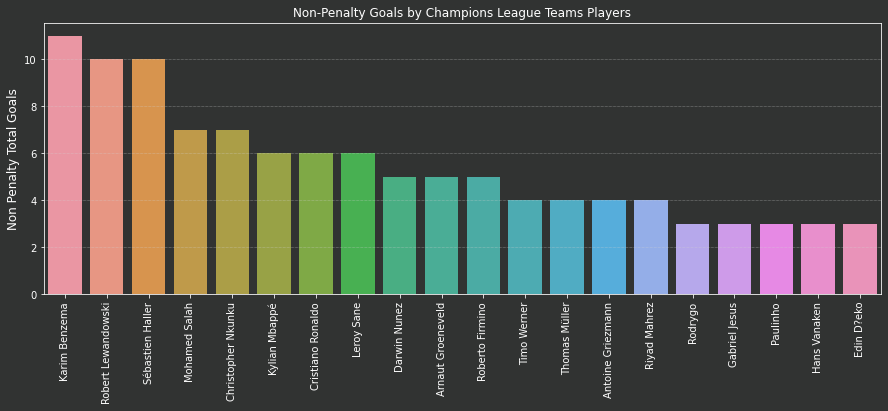

In [324]:
background = "#313332"
backgroundr = "#6D6D6D"
text_color = "w"
title_font="Alegreya Sans"

plt.figure(figsize=(15,10))
fig, ax = plt.subplots(figsize=(15,5))
ax.patch.set_facecolor(background)
fig.set_facecolor(background)

ax.grid(ls="dotted",lw=0.5,color="lightgrey",zorder=1)
bar_ap = sns.barplot(data =datanpgoaltw, x='Player', y='GmPK',linewidth=0.2)
bar_ap.set_xticklabels(bar_ap.get_xticklabels(), rotation=90)
plt.title("Non-Penalty Goals by Champions League Teams Players", fontsize = 12)
plt.ylabel("Non Penalty Total Goals",fontsize = 12,color="white" );
plt.xlabel("",fontsize = 12 , color = 'brown');
plt.show()

Text(0, 0.5, 'Non Penalty Goal Expectations(xG) ')

<Figure size 1080x720 with 0 Axes>

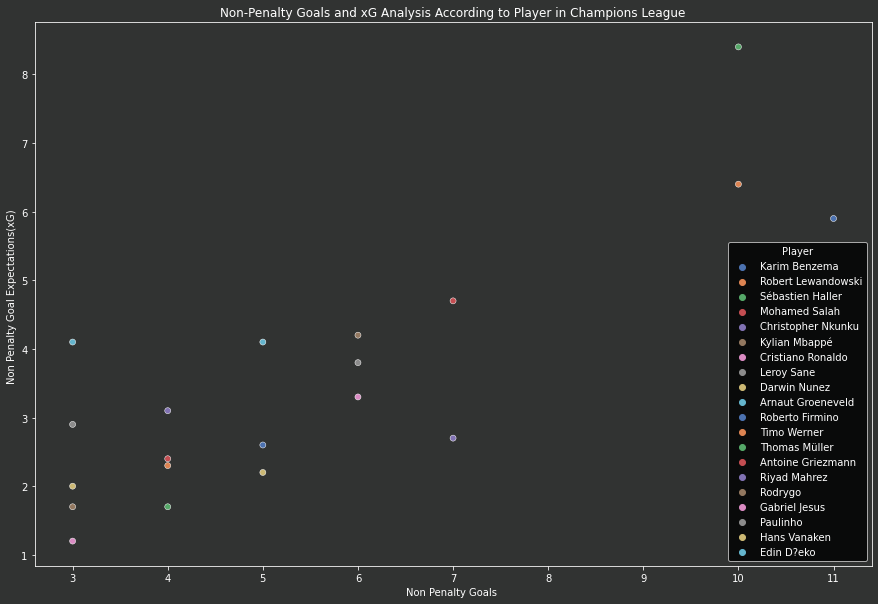

In [188]:
background = "#313332"
text_color = "w"
title_font="Alegreya Sans"

plt.figure(figsize=(15,10))
fig, ax = plt.subplots(figsize=(15,10))
ax.patch.set_facecolor(background)
fig.set_facecolor(background)


sns.scatterplot(data=datanpgoaltw, x="GmPK",y ="npxG",hue="Player",palette = "deep")
plt.title("Non-Penalty Goals and xG Analysis According to Player in Champions League", fontsize = 12)
plt.xlabel("Non Penalty Goals ",fontsize = 10 , color = 'white')
plt.ylabel("Non Penalty Goal Expectations(xG) ",fontsize = 10 , color = 'white')

In [189]:
datastliv= data[datast['Squad'] == " Liverpool"]
datastcity= data[datast['Squad'] == " Manchester City"]
datastvil= data[datast['Squad'] == "Villarreal"]
datastbay= data[datast['Squad'] == "Bayern Munich"]
datastchel= data[datast['Squad'] == " Chelsea"]
datastben= data[datast['Squad'] == "Benfica"]
datastreal= data[datast['Squad'] == "Real Madrid"]
datastatmad= data[datast['Squad'] == "Athletico Madrid"]


In [190]:
datastquarter=pd.concat([datastliv,datastcity,datastvil,datastbay,datastchel,datastben,datastreal,datastatmad])


In [191]:
datastquarter.drop(['PlayerN','NationN','SquadN','AgeN'],inplace=True,axis=1)

In [192]:
datastquarter.head()

,Player,Nation,Pos,Squad,Age,MP,Starts,Min,90s,Gls,...,GpAmPKPer90,xG,npxG,xA,npxGxA,xGPer90,xAPer90,xGxAPer90,npxGPer90,npxGxAPer90
17,Thiago Alcántara,ESP,MF,Liverpool,31,7,4,357,4.0,1,...,0.25,0.1,0.1,0.1,0.2,0.02,0.02,0.04,0.02,0.04
18,Trent Alexander-Arnold,ENG,DF,Liverpool,23,6,6,531,5.9,0,...,0.34,0.2,0.2,1.6,1.8,0.04,0.26,0.30,0.04,0.30
19,Alisson,BRA,GK,Liverpool,29,10,10,900,10.0,0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
77,Conor Bradley,NIR,FW,Liverpool,18,1,0,1,0.0,0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
168,Luis Díaz,COL,FW,Liverpool,25,4,2,195,2.2,1,...,0.92,1.4,1.4,1.0,2.4,0.63,0.47,1.10,0.63,1.10


In [193]:
datastquarterxG = datastquarter.sort_values(by=['npxG'],ascending=False)
datastquarterxG.head(20)

,Player,Nation,Pos,Squad,Age,MP,Starts,Min,90s,Gls,...,GpAmPKPer90,xG,npxG,xA,npxGxA,xGPer90,xAPer90,xGxAPer90,npxGPer90,npxGxAPer90
358,Robert Lewandowski,POL,FW,Bayern Munich,33,10,10,874,9.7,13,...,1.34,9.4,6.4,1.6,7.9,0.97,0.16,1.13,0.65,0.82
59,Karim Benzema,FRA,FW,Real Madrid,34,9,9,819,9.1,12,...,1.21,6.7,5.9,1.9,7.8,0.73,0.20,0.94,0.65,0.85
587,Mohamed Salah,EGY,FW,Liverpool,29,10,9,734,8.2,8,...,0.86,6.2,4.7,1.0,5.6,0.76,0.12,0.88,0.57,0.69
245,Arnaut Groeneveld,NED,FW,Villarreal,25,10,9,818,9.1,6,...,0.77,4.6,4.1,1.0,5.1,0.51,0.10,0.62,0.45,0.56
593,Leroy Sane,GER,FWMF,Bayern Munich,26,10,9,795,8.8,6,...,1.36,3.8,3.8,2.6,6.4,0.43,0.29,0.72,0.43,0.72
638,Raheem Sterling,ENG,FW,Manchester City,27,10,5,555,6.2,3,...,0.81,3.4,3.4,1.4,4.7,0.54,0.23,0.77,0.54,0.77
736,Roman Yaremchuk,UKR,FW,Benfica,26,10,6,511,5.7,3,...,0.53,3.1,3.1,0.4,3.5,0.54,0.08,0.62,0.54,0.62
378,Riyad Mahrez,ALG,FW,Manchester City,31,10,9,809,9.0,6,...,0.56,4.7,3.1,1.6,4.7,0.52,0.18,0.70,0.35,0.53
389,Sadio Mane,SEN,FW,Liverpool,30,10,8,567,6.3,3,...,0.63,2.6,2.6,1.4,4.1,0.42,0.23,0.64,0.42,0.64
302,Vinicius Junior,BRA,FW,Real Madrid,21,10,10,903,10.0,2,...,0.80,2.6,2.6,3.0,5.7,0.26,0.30,0.56,0.26,0.56


<Figure size 1080x720 with 0 Axes>

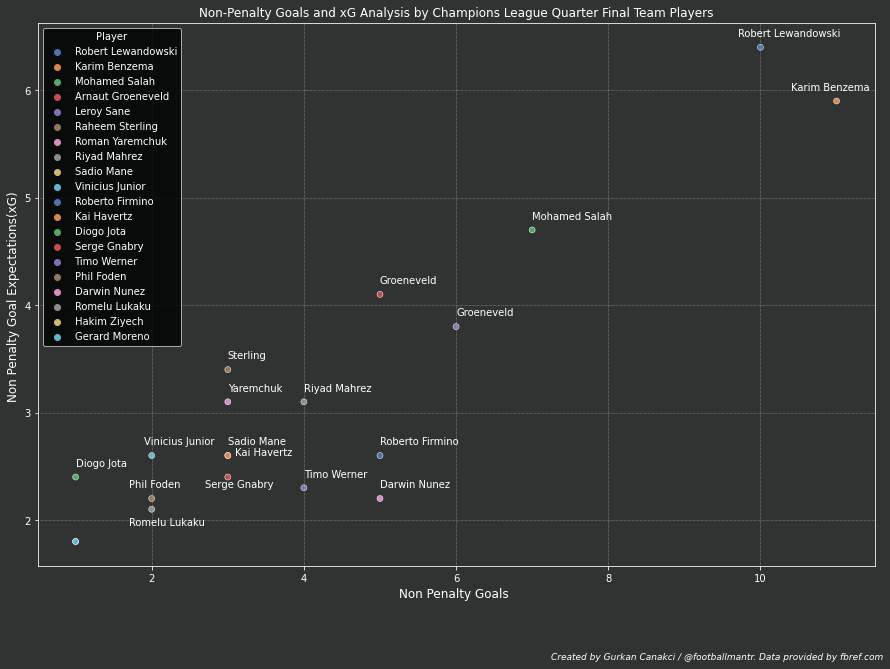

In [312]:
background = "#313332"
backgroundr = "#6D6D6D"
text_color = "w"
title_font="Alegreya Sans"

plt.figure(figsize=(15,10))
fig, ax = plt.subplots(figsize=(15,10))
ax.patch.set_facecolor(background)
fig.set_facecolor(background)

ax.grid(ls="dotted",lw=0.5,color="lightgrey",zorder=1)


sns.scatterplot(data=datastquarterxG.head(20), x="GmPK",y ="npxG",hue="Player",palette = "deep")

plt.text(datastquarterxG.GmPK[datastquarterxG.Player=='Robert Lewandowski']-0.3,
         datastquarterxG.npxG[datastquarterxG.Player=='Robert Lewandowski']+0.1,"Robert Lewandowski", color='white')
plt.text(datastquarterxG.GmPK[datastquarterxG.Player=='Karim Benzema']-0.6,
         datastquarterxG.npxG[datastquarterxG.Player=='Karim Benzema']+0.1,"Karim Benzema", color='white')
plt.text(datastquarterxG.GmPK[datastquarterxG.Player=='Mohamed Salah'],
         datastquarterxG.npxG[datastquarterxG.Player=='Mohamed Salah']+0.1,"Mohamed Salah", color='white')
plt.text(datastquarterxG.GmPK[datastquarterxG.Player=='Arnaut Groeneveld'],
         datastquarterxG.npxG[datastquarterxG.Player=='Arnaut Groeneveld']+0.1,"Groeneveld", color='white')
plt.text(datastquarterxG.GmPK[datastquarterxG.Player=='Leroy Sane'],
         datastquarterxG.npxG[datastquarterxG.Player=='Leroy Sane']+0.1,"Groeneveld", color='white')
plt.text(datastquarterxG.GmPK[datastquarterxG.Player=='Raheem Sterling'],
         datastquarterxG.npxG[datastquarterxG.Player=='Raheem Sterling']+0.1,"Sterling", color='white')
plt.text(datastquarterxG.GmPK[datastquarterxG.Player=='Roman Yaremchuk'],
         datastquarterxG.npxG[datastquarterxG.Player=='Roman Yaremchuk']+0.1,"Yaremchuk", color='white')
plt.text(datastquarterxG.GmPK[datastquarterxG.Player=='Riyad Mahrez'],
         datastquarterxG.npxG[datastquarterxG.Player=='Riyad Mahrez']+0.1,"Riyad Mahrez", color='white')
plt.text(datastquarterxG.GmPK[datastquarterxG.Player=='Sadio Mane'],
         datastquarterxG.npxG[datastquarterxG.Player=='Sadio Mane']+0.1,"Sadio Mane", color='white')
plt.text(datastquarterxG.GmPK[datastquarterxG.Player=='Vinicius Junior']-0.1,
         datastquarterxG.npxG[datastquarterxG.Player=='Vinicius Junior']+0.1,"Vinicius Junior", color='white')
plt.text(datastquarterxG.GmPK[datastquarterxG.Player=='Roberto Firmino'],
         datastquarterxG.npxG[datastquarterxG.Player=='Roberto Firmino']+0.1,"Roberto Firmino", color='white')
plt.text(datastquarterxG.GmPK[datastquarterxG.Player=='Kai Havertz']+0.1,
         datastquarterxG.npxG[datastquarterxG.Player=='Kai Havertz'],"Kai Havertz", color='white')
plt.text(datastquarterxG.GmPK[datastquarterxG.Player=='Diogo Jota'],
         datastquarterxG.npxG[datastquarterxG.Player=='Diogo Jota']+0.1,"Diogo Jota", color='white')
plt.text(datastquarterxG.GmPK[datastquarterxG.Player=='Darwin Nunez'],
         datastquarterxG.npxG[datastquarterxG.Player=='Darwin Nunez']+0.1,"Darwin Nunez", color='white')
plt.text(datastquarterxG.GmPK[datastquarterxG.Player=='Timo Werner'],
         datastquarterxG.npxG[datastquarterxG.Player=='Timo Werner']+0.1,"Timo Werner", color='white')
plt.text(datastquarterxG.GmPK[datastquarterxG.Player=='Serge Gnabry']-0.3,
         datastquarterxG.npxG[datastquarterxG.Player=='Serge Gnabry']-0.1,"Serge Gnabry", color='white')
plt.text(datastquarterxG.GmPK[datastquarterxG.Player=='Romelu Lukaku']-0.3,
         datastquarterxG.npxG[datastquarterxG.Player=='Romelu Lukaku']-0.15,"Romelu Lukaku", color='white')
plt.text(datastquarterxG.GmPK[datastquarterxG.Player=='Phil Foden']-0.3,
         datastquarterxG.npxG[datastquarterxG.Player=='Phil Foden']+0.1,"Phil Foden", color='white')


plt.title("Non-Penalty Goals and xG Analysis by Champions League Quarter Final Team Players", fontsize = 12)
plt.xlabel("Non Penalty Goals ",fontsize = 12 , color = 'white')
plt.ylabel("Non Penalty Goal Expectations(xG) ",fontsize = 12 , color = 'white')

fig.text(0.6, -0.005, "Created by Gurkan Canakci / @footballmantr. Data provided by fbref.com",
        fontstyle="italic",fontsize=9, fontfamily=title_font, color=text_color)
plt.show();

## Import Defensive Actions Player in Champions League

In [195]:
datad = pd.read_csv("defensive-actions-player-championsleague.csv",sep=';',encoding='latin-1')
datadef = datad.copy()

In [196]:
datadef.head()

,PlayerN,Player,NationN,Nation,Pos,SquadN,Squad,90s,Tkl,TklW,...,Mid3rdPress,Att3rdPress,BlocksBl,BlocksSh,BlocksShT,BlocksPass,Int,TklInt,Clr,Err
0,Brenden Aaronson\5bc43860,Brenden Aaronson,us USA,USA,MF,at RB Salzburg,RB Salzburg,7.9,10,9,...,102,83,7,1,0,6,5,15,6,0
1,Malik Abubakari\47aaf574,Malik Abubakari,gh GHA,GHA,FW,se Malmö,Malmö,1.3,2,1,...,6,6,1,0,0,1,0,2,2,0
2,Marcos Acuña\81442ecb,Marcos Acuña,ar ARG,ARG,DF,es Sevilla,Sevilla,4.2,14,10,...,27,4,6,1,0,5,12,26,2,0
3,Tyler Adams\2b09d998,Tyler Adams,us USA,USA,MF,de RB Leipzig,RB Leipzig,3.3,9,4,...,57,13,9,2,0,7,3,12,1,0
4,Chikwubuike Adamu\82e12fe7,Chikwubuike Adamu,at AUT,AUT,FW,at RB Salzburg,RB Salzburg,2.6,2,1,...,18,28,1,0,0,1,3,5,0,0


In [197]:
datadef.drop(['PlayerN','NationN','SquadN'],inplace=True,axis=1)

In [198]:
datadef.columns

Index(['Player', 'Nation', 'Pos', 'Squad', '90s', 'Tkl', 'TklW', 'Def3rdTkl',
       'Mid3rdTkl', 'Att3rdTkl', 'TotPress', 'SuccPres', 'PressRt',
       'Def3rdPress', 'Mid3rdPress', 'Att3rdPress', 'BlocksBl', 'BlocksSh',
       'BlocksShT', 'BlocksPass', 'Int', 'TklInt', 'Clr', 'Err'],
      dtype='object')

In [199]:
datapress= datadef.sort_values(by=['TotPress'],ascending=False)

In [200]:
datapress['TotPress'].max()

224

In [201]:
datapress['TotPress'].mean()

48.394666666666666

In [202]:
datapressh = datapress[datapress['TotPress']>=48.5]

<Figure size 1080x720 with 0 Axes>

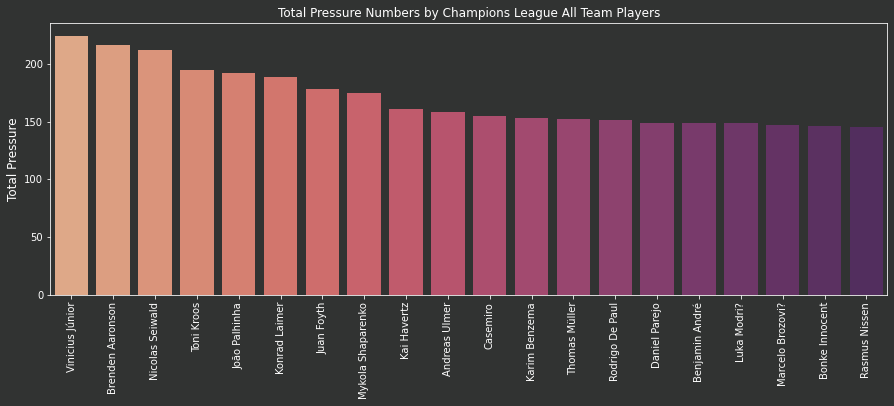

In [269]:
background = "#313332"
backgroundr = "#6D6D6D"
text_color = "w"
title_font="Alegreya Sans"

plt.figure(figsize=(15,10))
fig, ax = plt.subplots(figsize=(15,5))
ax.patch.set_facecolor(background)
fig.set_facecolor(background)

bar_ap = sns.barplot(data =datapressh.head(20), x='Player', y='TotPress',linewidth=0.2,palette="flare")
bar_ap.set_xticklabels(bar_ap.get_xticklabels(), rotation=90)
plt.ylabel("Total Pressure",fontsize = 12);
plt.xlabel("",fontsize = 12 , color = 'green');
plt.title("Total Pressure Numbers by Champions League All Team Players", fontsize = 12)

plt.show()

### Toplam Pres Sayıları

Şampiyonlar ligi genelinde bu sezon yarı finale kadar oynanan maçlarda en fazla presi Vinicius Junior yaptı. 

Tabi ki bu pres aksiyonlar hem hücum hem defans bölgesinde yapılan toplam sayıyı ifade etmektedir.

Text(0, 0.5, 'Total Tackles')

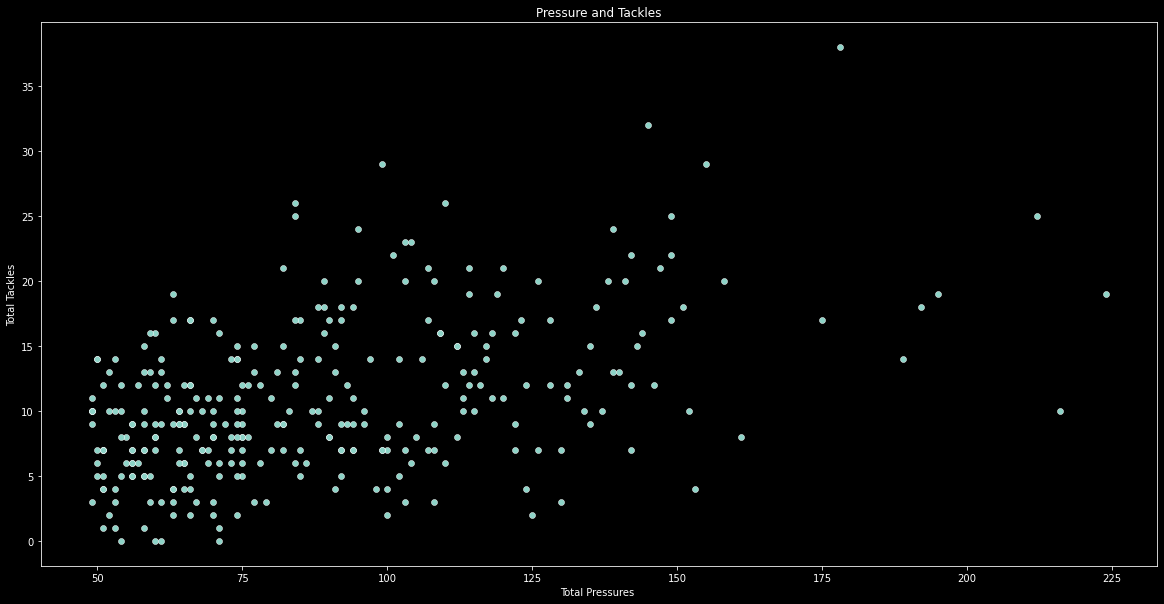

In [204]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=datapressh, x="TotPress",y ="Tkl",palette = "deep")
plt.title("Pressure and Tackles", fontsize = 12)
plt.xlabel("Total Pressures ",fontsize = 10 , color = 'white')
plt.ylabel("Total Tackles",fontsize = 10 , color = 'white')

In [205]:
datadefliv= datad[datadef['Squad'] == " Liverpool"]
datadefcity= datad[datadef['Squad'] == " Manchester City"]
datadefvil= datad[datadef['Squad'] == "Villarreal"]
datadefbay= datad[datadef['Squad'] == "Bayern Munich"]
datadefchel= datad[datadef['Squad'] == " Chelsea"]
datadefben= datad[datadef['Squad'] == "Benfica"]
datadefreal= datad[datadef['Squad'] == "Real Madrid"]
datadefatmad= datad[datadef['Squad'] == "Athletico Madrid"]

In [206]:
datadefquarter=pd.concat([datadefliv,datadefcity,datadefvil,datadefbay,datadefchel,datadefben,datadefreal,datadefatmad])


In [207]:
datadefquarter.drop(['PlayerN','NationN','SquadN'],inplace=True,axis=1)

In [208]:
datadefquarter.columns

Index(['Player', 'Nation', 'Pos', 'Squad', '90s', 'Tkl', 'TklW', 'Def3rdTkl',
       'Mid3rdTkl', 'Att3rdTkl', 'TotPress', 'SuccPres', 'PressRt',
       'Def3rdPress', 'Mid3rdPress', 'Att3rdPress', 'BlocksBl', 'BlocksSh',
       'BlocksShT', 'BlocksPass', 'Int', 'TklInt', 'Clr', 'Err'],
      dtype='object')

In [209]:
datapressquarter= datadefquarter.sort_values(by=['TotPress'],ascending=False)

In [320]:
datapressquarter['TotPress'].mean()

57.64772727272727

<Figure size 1080x720 with 0 Axes>

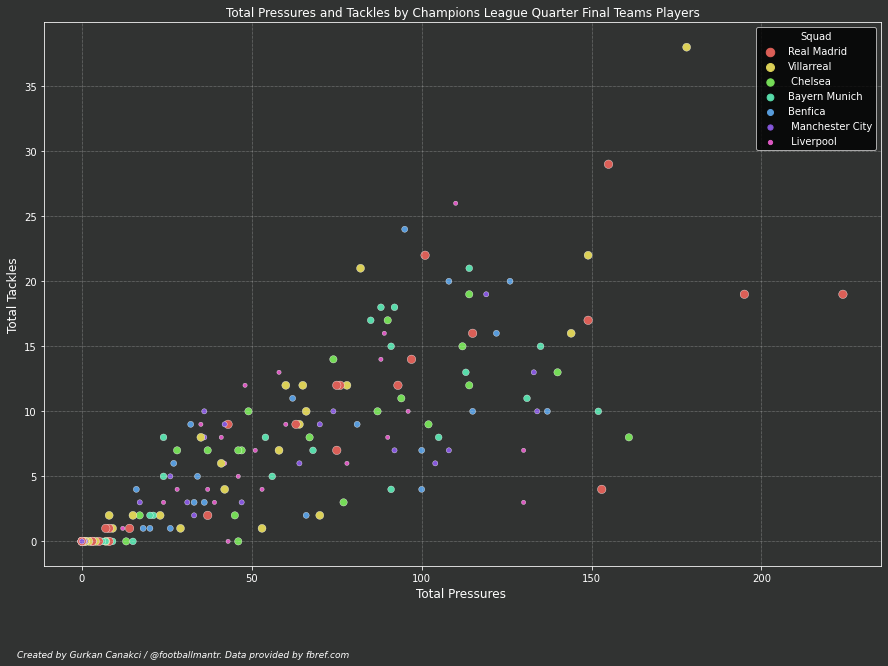

In [319]:
background = "#313332"
backgroundr = "#6D6D6D"
text_color = "w"
title_font="Alegreya Sans"

plt.figure(figsize=(15,10))
fig, ax = plt.subplots(figsize=(15,10))
ax.patch.set_facecolor(background)
fig.set_facecolor(background)

ax.grid(ls="dotted",lw=0.5,color="lightgrey",zorder=1)

sns.scatterplot(data=datapressquarter, x="TotPress",y ="Tkl", hue="Squad",size="Squad",palette = "hls")
plt.title("Total Pressures and Tackles by Champions League Quarter Final Teams Players", fontsize = 12)
plt.xlabel("Total Pressures ",fontsize = 12 , color = 'white')
plt.ylabel("Total Tackles",fontsize = 12 , color = 'white')
fig.text(0.1, -0.001, "Created by Gurkan Canakci / @footballmantr. Data provided by fbref.com",
        fontstyle="italic",fontsize=9, fontfamily=title_font, color=text_color)
plt.show();

Çeyrek final takımları arasında Real Madrid takımının oyuncuları pres-top kapma rakamlarında ilk sıralarda görünmektedir.

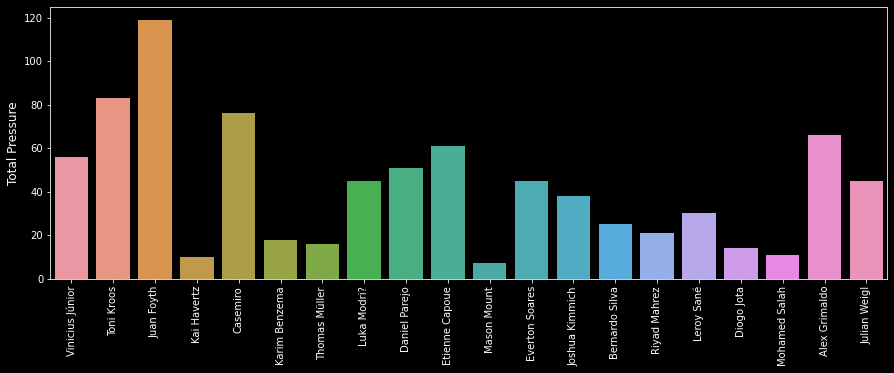

In [213]:
plt.figure(figsize=(15,5));
bar_ap = sns.barplot(data =datapressquarter.head(20), x='Player', y='Def3rdPress',linewidth=0.2)
bar_ap.set_xticklabels(bar_ap.get_xticklabels(), rotation=90)
plt.ylabel("Total Pressure",fontsize = 12);
plt.xlabel("",fontsize = 12 , color = 'green');
plt.show()

In [299]:
datatacklequarter= datadefquarter.sort_values(by=['Tkl'],ascending=False)
datatacklequarter.head()

,Player,Nation,Pos,Squad,90s,Tkl,TklW,Def3rdTkl,Mid3rdTkl,Att3rdTkl,...,Mid3rdPress,Att3rdPress,BlocksBl,BlocksSh,BlocksShT,BlocksPass,Int,TklInt,Clr,Err
214,Juan Foyth,ARG,DF,Villarreal,7.9,38,17,25,10,3,...,52,7,13,4,0,9,19,57,19,1
103,Casemiro,BRA,MF,Real Madrid,8.3,29,19,14,12,3,...,60,19,17,5,0,12,18,47,13,0
197,Fabinho,BRA,MF,Liverpool,6.5,26,17,5,15,6,...,71,12,11,0,0,11,14,40,7,0
226,Gilberto,BRA,DF,Benfica,7.9,24,9,15,8,1,...,36,18,15,2,0,13,25,49,17,1
435,Eder Militao,BRA,DF,Real Madrid,8.7,22,11,17,4,1,...,34,4,17,10,0,7,24,46,23,0


<Figure size 1080x720 with 0 Axes>

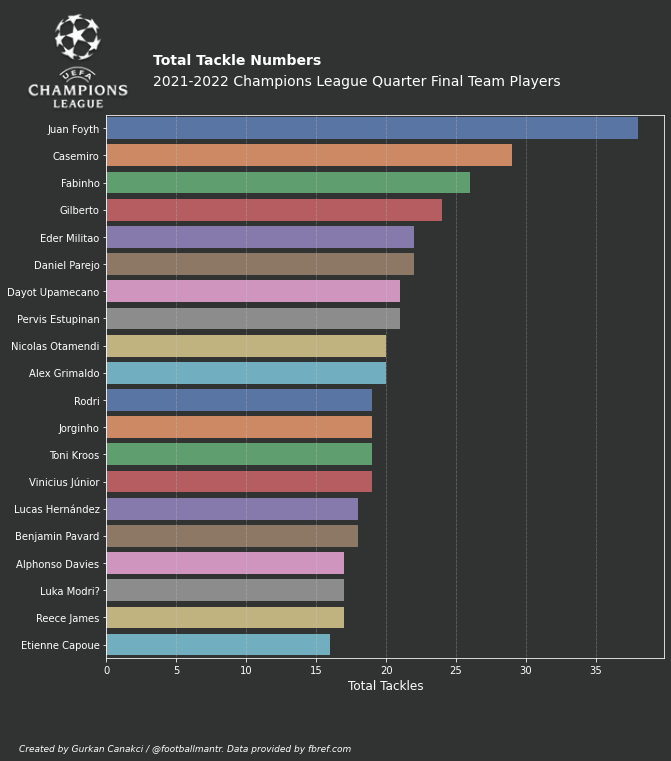

In [301]:
background = "#313332"
text_color = "w"
title_font="Alegreya Sans"


plt.figure(figsize=(15,10))
fig, ax = plt.subplots(figsize=(10,10))
ax.patch.set_facecolor(background)
fig.set_facecolor(background)

ax.grid(ls="dotted",lw=0.5,color="lightgrey",zorder=1)

fig.text(0.19,0.95,"Total Tackle Numbers ", fontsize=14, fontweight="bold",color=text_color,fontfamily=title_font)
fig.text(0.19,0.92,"2021-2022 Champions League Quarter Final Team Players",fontweight="regular", fontsize=14,color = text_color,fontfamily=title_font)


ax = sns.barplot(data =datatacklequarter.head(20), x='Tkl', y='Player',palette="deep",linewidth=0.2)
bar_ap.set_xticklabels(bar_ap.get_xticklabels(), rotation=90)
plt.ylabel("",fontsize = 12);
plt.xlabel("Total Tackles",fontsize = 12 , color = 'white');

ax2 = fig.add_axes([0.01,0.88,0.15,0.15]) # badge
ax2.axis("off")
url = "https://i.pinimg.com/originals/26/70/01/267001e4c98f2832f2f942e3161cfec8.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

basewidth = 100
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), Image.ANTIALIAS)


baseheight = 100
hpercent = (baseheight / float(img.size[1]))
wsize = int((float(img.size[0]) * float(hpercent)))
img = img.resize((wsize, baseheight), Image.ANTIALIAS)


ax2.imshow(img)

fig.text(0.003, -0.005, "Created by Gurkan Canakci / @footballmantr. Data provided by fbref.com",
        fontstyle="italic",fontsize=9, fontfamily=title_font, color=text_color)


plt.show()


### Top Kapma Sayıları

Şampiyonlar ligi çeyrek finaline kalan 8 takımın oyuncularına dair top kapma istatistiklerini ele aldığımızda Villarreal bek oyuncusu Juan Foyth 1.sırada bulunmaktadır.

2.sırayı Real Madrid orta saha oyuncusu Casemiro alırken 3.sırada Fabinho bulunmaktadır.

<Figure size 1080x720 with 0 Axes>

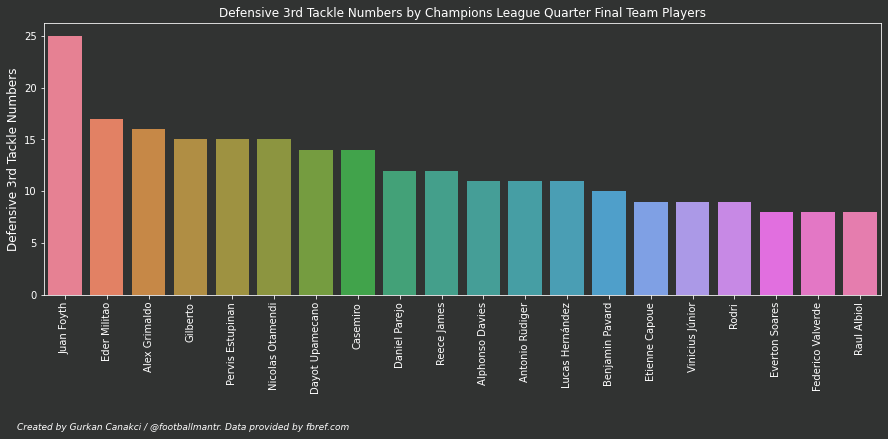

In [298]:
datadeftacklequarter =datatacklequarter.sort_values(by=['Def3rdTkl'],ascending=False)

background = "#313332"
backgroundr = "#6D6D6D"
text_color = "w"
title_font="Alegreya Sans"

plt.figure(figsize=(15,10))
fig, ax = plt.subplots(figsize=(15,5))
ax.patch.set_facecolor(background)
fig.set_facecolor(background)

bar_ap = sns.barplot(data =datadeftacklequarter.head(20), x='Player', y='Def3rdTkl',linewidth=0.2,palette="husl")
bar_ap.set_xticklabels(bar_ap.get_xticklabels(), rotation=90)
plt.title("Defensive 3rd Tackle Numbers by Champions League Quarter Final Team Players", fontsize = 12)
plt.ylabel("Defensive 3rd Tackle Numbers",fontsize = 12);
plt.xlabel("",fontsize = 12 , color = 'green');
fig.text(0.1, -0.25, "Created by Gurkan Canakci / @footballmantr. Data provided by fbref.com",
        fontstyle="italic",fontsize=9, fontfamily=title_font, color=text_color)
plt.show()

Text(0.1, -0.01, 'Created by Gurkan Canakci / @footballmantr. Data provided by fbref.com')

<Figure size 1080x720 with 0 Axes>

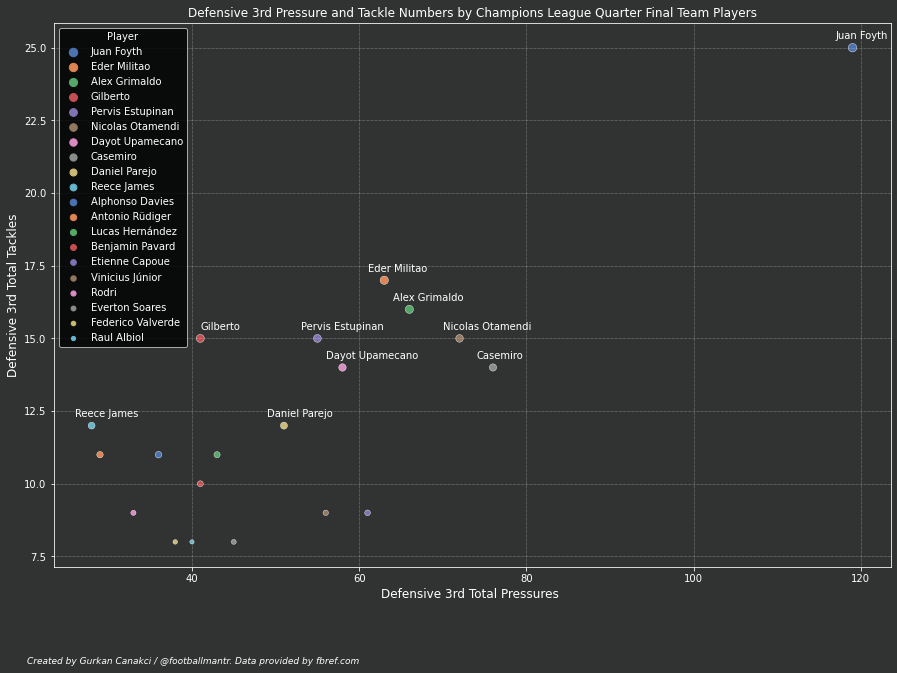

In [297]:
background = "#313332"
backgroundr = "#6D6D6D"
text_color = "w"
title_font="Alegreya Sans"

plt.figure(figsize=(15,10))
fig, ax = plt.subplots(figsize=(15,10))
ax.patch.set_facecolor(background)
fig.set_facecolor(background)



ax.grid(ls="dotted",lw=0.5,color="lightgrey",zorder=1)

ax = sns.scatterplot(data=datadeftacklequarter.head(20), x="Def3rdPress",y ="Def3rdTkl",hue="Player",size="Player",palette = "deep")

plt.text(datadeftacklequarter.Def3rdPress[datadeftacklequarter.Player=='Juan Foyth']-2,
         datadeftacklequarter.Def3rdTkl[datadeftacklequarter.Player=='Juan Foyth']+0.3,"Juan Foyth", color='white')
plt.text(datadeftacklequarter.Def3rdPress[datadeftacklequarter.Player=='Eder Militao']-2,
         datadeftacklequarter.Def3rdTkl[datadeftacklequarter.Player=='Eder Militao']+0.3,"Eder Militao", color='white')
plt.text(datadeftacklequarter.Def3rdPress[datadeftacklequarter.Player=='Alex Grimaldo']-2,
         datadeftacklequarter.Def3rdTkl[datadeftacklequarter.Player=='Alex Grimaldo']+0.3,"Alex Grimaldo", color='white')
plt.text(datadeftacklequarter.Def3rdPress[datadeftacklequarter.Player=='Gilberto'],
         datadeftacklequarter.Def3rdTkl[datadeftacklequarter.Player=='Gilberto']+0.3,"Gilberto", color='white')
plt.text(datadeftacklequarter.Def3rdPress[datadeftacklequarter.Player=='Pervis Estupinan']-2,
         datadeftacklequarter.Def3rdTkl[datadeftacklequarter.Player=='Pervis Estupinan']+0.3,"Pervis Estupinan", color='white')
plt.text(datadeftacklequarter.Def3rdPress[datadeftacklequarter.Player=='Nicolas Otamendi']-2,
         datadeftacklequarter.Def3rdTkl[datadeftacklequarter.Player=='Nicolas Otamendi']+0.3,"Nicolas Otamendi", color='white')
plt.text(datadeftacklequarter.Def3rdPress[datadeftacklequarter.Player=='Dayot Upamecano']-2,
         datadeftacklequarter.Def3rdTkl[datadeftacklequarter.Player=='Dayot Upamecano']+0.3,"Dayot Upamecano", color='white')
plt.text(datadeftacklequarter.Def3rdPress[datadeftacklequarter.Player=='Casemiro']-2,
         datadeftacklequarter.Def3rdTkl[datadeftacklequarter.Player=='Casemiro']+0.3,"Casemiro", color='white')
plt.text(datadeftacklequarter.Def3rdPress[datadeftacklequarter.Player=='Daniel Parejo']-2,
         datadeftacklequarter.Def3rdTkl[datadeftacklequarter.Player=='Daniel Parejo']+0.3,"Daniel Parejo", color='white')
plt.text(datadeftacklequarter.Def3rdPress[datadeftacklequarter.Player=='Reece James']-2,
         datadeftacklequarter.Def3rdTkl[datadeftacklequarter.Player=='Reece James']+0.3,"Reece James", color='white')

plt.title("Defensive 3rd Pressure and Tackle Numbers by Champions League Quarter Final Team Players", fontsize = 12)
plt.xlabel("Defensive 3rd Total Pressures ",fontsize = 12 , color = 'white')
plt.ylabel("Defensive 3rd Total Tackles",fontsize = 12 , color = 'white')

fig.text(0.1, -0.01, "Created by Gurkan Canakci / @footballmantr. Data provided by fbref.com",
        fontstyle="italic",fontsize=9, fontfamily=title_font, color=text_color)

## 1.Bölgede Pres ve Top Kapma Aksiyonları

Şampiyonlar liginin çeyrek finale kalan takımlarının oyuncu bazında 1.bölgedeki pres ve top kapma aksiyonlarını incelediğimizde Villareal takımından Juan Foyth açık ara lider konumdadır.

Eder Militao ise top kapma sayılarında iyi olmasına rağmen pres aksiyonlarında orta sıralarda yer almaktadır.

Top kapma sayılarında ise Foyth dan sonraki en iyi oyuncu Real Madrid orta sahasında oynayan Casemiro'dur.